In [1]:
# Load required libraries
import numpy as np
import pandas as pd

# Custom utils from kesh-utils (Check source code: https://github.com/KeshavShetty/kesh-utils)
from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp
from KUtils.classifier import generic_classifier_utils as gcu

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score


In [2]:
# Show all column in head()
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
# Data generated from ../Sampleing.ipyb
train_df = pd.read_csv('wns_train_df.csv')
test_df = pd.read_csv('wns_test_df.csv')


# 1. Model 1 on inner (With Bayesian Optimization)

In [5]:
train_df = train_df
# Putting feature variable to X
X = train_df.drop(['impression_id', 'is_click'],axis=1)

# Putting response variable to y
y = train_df['is_click']

X_train = X
y_train = y

X_test = X
y_test = y


#categorical_features_indices = np.where(X.dtypes != np.float)[0]


In [6]:
from catboost import CatBoostClassifier, Pool, cv

#cat_clf = CatBoostClassifier(learning_rate=0.01, iterations=100000, eval_metric='AUC', l2_leaf_reg=3, task_type="GPU")
cat_clf = CatBoostClassifier(learning_rate=0.01, iterations=10000, eval_metric='AUC', l2_leaf_reg=4, task_type="GPU")
cat_clf.fit(X_train, y_train, cat_features = [])
#predict proba
ext_pred_proba = cat_clf.predict_proba(test_df.drop(['impression_id'], axis=1))



0:	learn: 0.5722330	total: 6.02ms	remaining: 1m
1:	learn: 0.5748485	total: 9.99ms	remaining: 50s
2:	learn: 0.5934373	total: 15.6ms	remaining: 52s
3:	learn: 0.5973303	total: 20.8ms	remaining: 52s
4:	learn: 0.6332353	total: 26.4ms	remaining: 52.8s
5:	learn: 0.6300261	total: 31.9ms	remaining: 53.2s
6:	learn: 0.6276692	total: 37.5ms	remaining: 53.6s
7:	learn: 0.6271405	total: 41.8ms	remaining: 52.1s
8:	learn: 0.6233922	total: 47ms	remaining: 52.2s
9:	learn: 0.6204681	total: 51.7ms	remaining: 51.6s
10:	learn: 0.6219016	total: 57.3ms	remaining: 52s
11:	learn: 0.6218227	total: 61.2ms	remaining: 51s
12:	learn: 0.6191792	total: 65.5ms	remaining: 50.3s
13:	learn: 0.6188371	total: 70ms	remaining: 50s
14:	learn: 0.6200494	total: 74.7ms	remaining: 49.7s
15:	learn: 0.6183937	total: 80.5ms	remaining: 50.2s
16:	learn: 0.6207865	total: 86ms	remaining: 50.5s
17:	learn: 0.6195870	total: 91.7ms	remaining: 50.9s
18:	learn: 0.6195115	total: 97.3ms	remaining: 51.1s
19:	learn: 0.6186547	total: 103ms	remaining

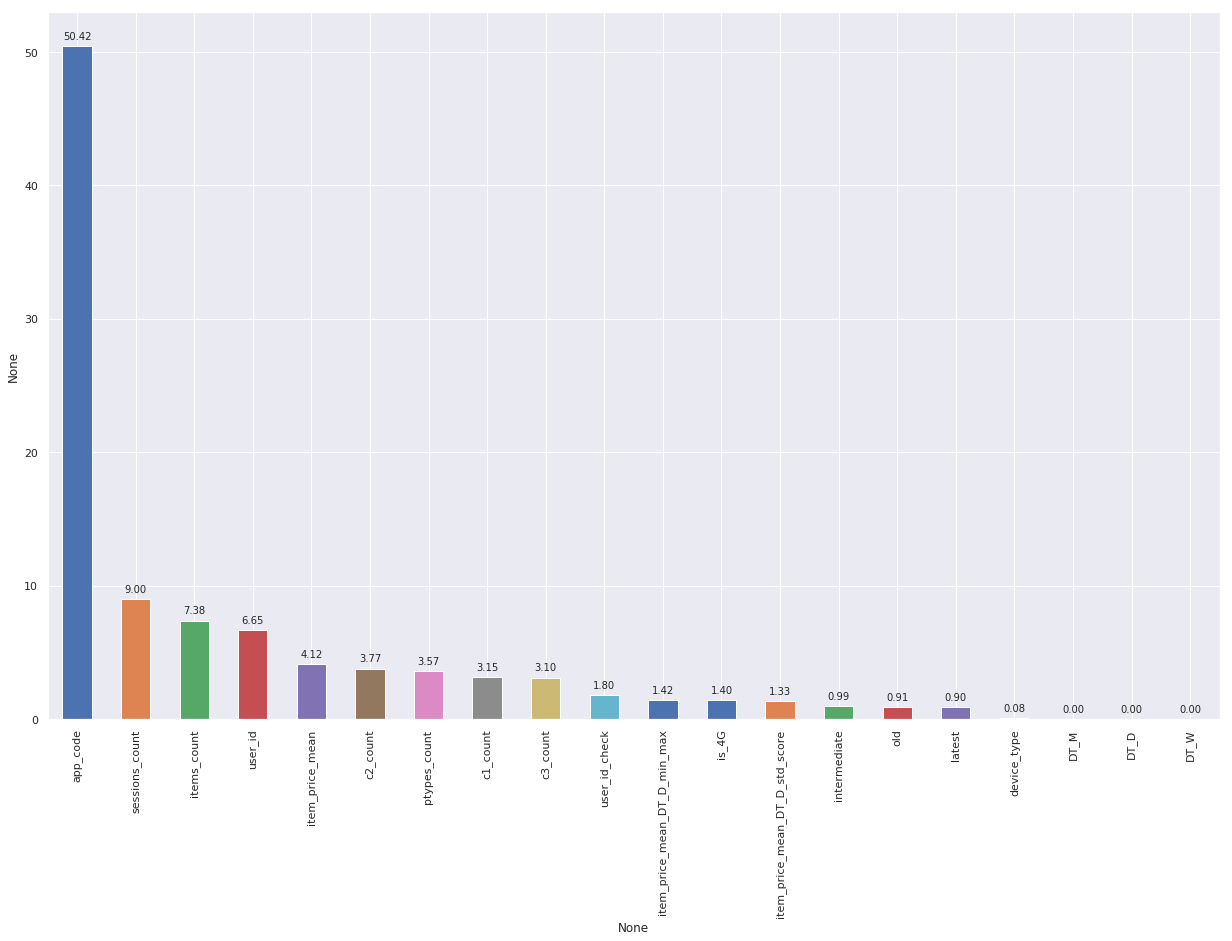

In [7]:
# Feature importance
importances = cat_clf.get_feature_importance()
unique_dict = dict(zip(X.dtypes.index, importances))
chartil.core_barchart_from_series(
    pd.Series(unique_dict), 
    optional_settings={'sort_by_value':True, 'decimal_precision':2}) 

# Apply final model on test

In [8]:
test_df['is_click'] = ext_pred_proba[:,1]


In [9]:
inner_tst = test_df.loc[:,['impression_id', 'is_click' ]]

In [10]:
inner_tst.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.021316
1,caac14a5bf2ba283db7708bb34855760,0.010707
2,13f10ba306a19ce7bec2f3cae507b698,0.059681
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.017948
4,bf5a572cca75f5fc67f4b14e58b11d70,0.117500


In [11]:
submission_csv = inner_tst

In [12]:
submission_csv.shape

(90675, 2)

In [13]:
submission_csv.to_csv("wns_cat_submission.csv", index=False)
